# **Nonlinear Differential Equations and Root Finding**

## Newton-Rhapson root-finding method (**scalar**):

The Newton-Raphson method fits a tangent line to the point $(x^ k, r(x^ k))$ on the graph of $r(x)$. If we make this equation equal to 0, \
we find the root for function $r_{tan}$ evaluated at the point $x^k$:\
\
$r_{\rm tan}(x) = r(x^ k) + (x - x^ k) r'(x^ k)$\
\
and to find the root $x^*$ :\
\
$r_{\rm tan}(x^*) = r(x^ k) + (x^* - x^ k) r'(x^ k) = 0$\
\
$x^* = \large\frac{-r(x^ k)}{r'(x^ k)} + x^ k$
\
\
$x^{k+1} = x^*$ -> assign the new $x^k$ value to the root.\
\
and then we can keep going until we decide we are close enough to the analytical root $x^n$\
of the function $r(x)$

An alternative (but equivalent) derivation:\
\
$r(x^ k + \Delta x) \approx r(x^ k) + r'(x^ k)\Delta x$\
\
$r(x^ k) + r'(x^ k)\Delta x = 0 \Rightarrow \Delta x = -\frac{r(x^ k)}{r'(x^ k)}$\
\
$x^{k+1} = x^ k + \Delta x = x^ k - \frac{r(x^ k)}{r'(x^ k)}$

In [3]:
# find root of f(x) = 1 + x - x^4
import numpy as np
import matplotlib.pyplot as plt

def calcr(x):   
    return calcr_all(x, calc_r=True)
  
def calcdrdx(x):   
    return calcr_all(x, calc_drdx=True)

def calcr_all(x, calc_r=False, calc_drdx=False):
    """
    Calculate r and dr/dx

    Args:

    x: NumPy 1D array

    calc_r: boolean.
            If True, then calculate r(x)

    calc_drdx: boolean.
            If True, then calculate dr/dx(x)

    Returns:
        if calc_r and calc_drdx: return tuple (r, r_x)
        else return just r or just r_x
    """
    
    # Calculate r if requested
    if calc_r:
        # Simple r(x) example
        r = 1 + x - x**4
        
        # Uncomment the following for more complex demo
        # r = -3*x**3 + 7*x**2 - 4.

    # Calculate dr/dx if requested
    if calc_drdx:
        # drdx for simple r(x)
        r_x = 1 - 4*x**3
        
        # Uncomment the following for more complex demo
        # r_x = -9*x**2 + 14*x

    if calc_r and calc_drdx:
        return (r, r_x)
    elif calc_r:
        return r
    elif calc_drdx:
        return r_x
    else:
        raise ValueError("calc_r and calc_drdx both False")


def findroot_bisection(calc_r, a, b, n, ax=None):
    """
        Runs the bisection method for finding an approximation to a root
        of r(x) = 0

        Args:
            calc_r (scalar function reference): function which returns r(x) 
            when called as calc_r(x)
            
            a, b (float): numbers such that r(a)*r(b) < 0            
    		(i.e., r(a) and r(b) have opposite signs)
            
            n (int): number of iterations to take
            
            ax (matplotlib pyplot Axes object reference): if provided,
            the plot the locations in the x, r(x) plane for the current 
            bisection interval values of a, m, and b.
                
        Returns:
            x: approximation to a root of r, i.e., such that r(x) = 0
        """

    ra = calc_r(a)
    rb = calc_r(b)
    assert ra*rb < 0.0, "The bisection method needs an interval where the function changes sign"

    m = 0.5*(a+b)
    print(f"Iteration {0:2d}: x = {m: .10f}")
    for i in range(n):
            
        rm = calc_r(m)
        if (ax is not None):
            ax.plot(a,ra, marker='o', fillstyle='none', color='green', markersize=10)
            ax.plot(m,rm,'r*')
            ax.plot(b,rb, marker='o', fillstyle='none', color='blue', markersize=10)
            plt.pause(1.0)

        rma = rm*ra
        if rma > 0:    # ra and rm have the same sign, so a is replaced by m
            a  = m
            ra = rm
        elif rma < 0:  # rb and rm have the same sign, so b is replaced by m
            b  = m
            rb = rm
        else:          # only possible when r(m) == 0
            return m

        m = 0.5*(a+b)
        print(f"Iteration {i+1:2d}: x = {m: .10f}")
    
    if (ax is not None): # Plot location of final iterate
        ax.plot(a,ra, marker='o', fillstyle='none', color='green', markersize=10)
        ax.plot(m,calc_r(m),'m*')
        ax.plot(b,rb, marker='o', fillstyle='none', color='blue', markersize=10)

    
    return m


def findroot_Newton(calc_r, calc_drdx, x0, n, eps=None, ax=None):
    """
        Runs the Newton-Raphson method for finding an approximation to a root of r

        Args:
            calc_r (scalar function reference): function which returns r(x) 
                when called as calc_r(x)
                
            calc_drdx (scalar function reference): function which returns dr/dx(x) 
                when called as calc_drdx(x)

            x0 (float): initial guess of x

            n (int): number of iterations to take
            
            eps (float): if provided, use finite difference with a step size of 
            eps to calculate drdx (instead of calc_drdx) with finite difference method
            
            ax (matplotlib pyplot Axes object reference): if provided,
            the plot the locations in the xk, r(xk) plane for each
            Newton iterate
                
        Returns:
            x: approximation to a root of f, i.e., such that r(x) = 0

        """
    
    def fd_drdx(xk):  # Approximate the derivative with finite difference (fd) method.
        return (calc_r(xk+eps)-calc_r(xk-eps))/(2*eps)
    
    if (eps is not None):
        calc_drdx = fd_drdx

    xk = x0
    print(f"Iteration {0:2d}: x = {xk: .10f}")
    for i in range(n):
        rk = calc_r(xk)

        if (ax is not None): # Plot location of current iterate
            ax.plot(xk, rk, 'r*')
            plt.pause(1.0)

        drdxk = calc_drdx(xk)            
        xk = xk - rk/drdxk
        
        print(f"Iteration {i+1:2d}: x = {xk: .10f}")

    if (ax is not None): # Plot location of final iterate
        ax.plot(xk, calc_r(xk), 'm*')

    return xk

In [4]:
findroot_Newton(calcr, calcdrdx, 1, 5)

Iteration  0: x =  1.0000000000
Iteration  1: x =  1.3333333333
Iteration  2: x =  1.2358078603
Iteration  3: x =  1.2210589943
Iteration  4: x =  1.2207442258
Iteration  5: x =  1.2207440846


1.220744084605788

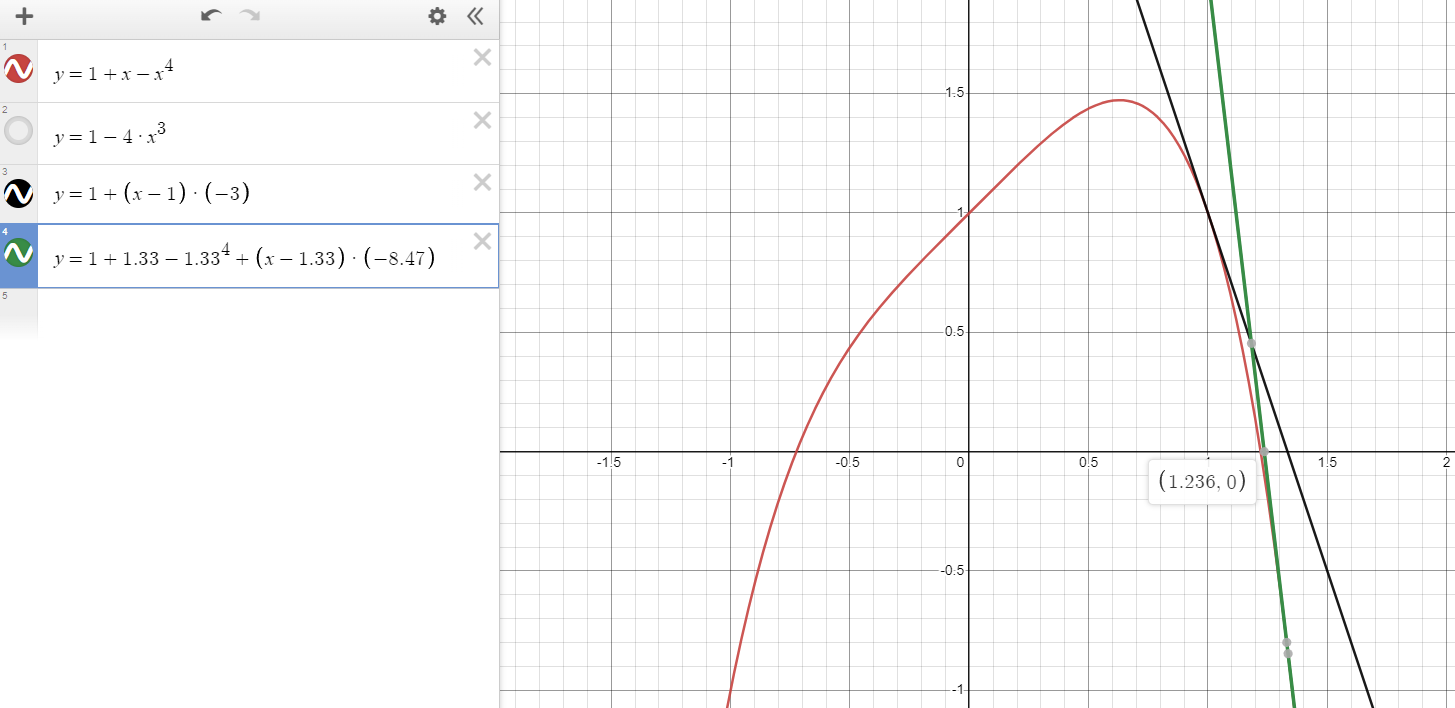

$x$ converges to a root near $x^1$

In [5]:
# Find root of f(u) = -sin(2*pi*u)*exp{-u}
import numpy as np
import matplotlib.pyplot as plt

def calcr(x):   
    return calcr_all(x, calc_r=True)
  
def calcdrdx(x):   
    return calcr_all(x, calc_drdx=True)

def calcr_all(x, calc_r=False, calc_drdx=False):
    """
    Calculate r and dr/dx

    Args:

    x: NumPy 1D array

    calc_r: boolean.
            If True, then calculate r(x)

    calc_drdx: boolean.
            If True, then calculate dr/dx(x)

    Returns:
        if calc_r and calc_drdx: return tuple (r, r_x)
        else return just r or just r_x
    """
    
    # Calculate r if requested
    if calc_r:
        # Simple r(x) example
        r = -np.sin(2*np.pi*x)*np.exp(-x)
        
        # Uncomment the following for more complex demo
        # r = -3*x**3 + 7*x**2 - 4.

    # Calculate dr/dx if requested
    if calc_drdx:
        # drdx for simple r(x)
        r_x = np.exp(-x)*(np.sin(2*np.pi*x) - 2*np.pi*np.cos(2*np.pi*x))
        
        # Uncomment the following for more complex demo
        # r_x = -9*x**2 + 14*x

    if calc_r and calc_drdx:
        return (r, r_x)
    elif calc_r:
        return r
    elif calc_drdx:
        return r_x
    else:
        raise ValueError("calc_r and calc_drdx both False")


def findroot_bisection(calc_r, a, b, n, ax=None):
    """
        Runs the bisection method for finding an approximation to a root
        of r(x) = 0

        Args:
            calc_r (scalar function reference): function which returns r(x) 
            when called as calc_r(x)
            
            a, b (float): numbers such that r(a)*r(b) < 0            
    		(i.e., r(a) and r(b) have opposite signs)
            
            n (int): number of iterations to take
            
            ax (matplotlib pyplot Axes object reference): if provided,
            the plot the locations in the x, r(x) plane for the current 
            bisection interval values of a, m, and b.
                
        Returns:
            x: approximation to a root of r, i.e., such that r(x) = 0
        """

    ra = calc_r(a)
    rb = calc_r(b)
    assert ra*rb < 0.0, "The bisection method needs an interval where the function changes sign"

    m = 0.5*(a+b)
    print(f"Iteration {0:2d}: x = {m: .10f}")
    for i in range(n):
            
        rm = calc_r(m)
        if (ax is not None):
            ax.plot(a,ra, marker='o', fillstyle='none', color='green', markersize=10)
            ax.plot(m,rm,'r*')
            ax.plot(b,rb, marker='o', fillstyle='none', color='blue', markersize=10)
            plt.pause(1.0)

        rma = rm*ra
        if rma > 0:    # ra and rm have the same sign, so a is replaced by m
            a  = m
            ra = rm
        elif rma < 0:  # rb and rm have the same sign, so b is replaced by m
            b  = m
            rb = rm
        else:          # only possible when r(m) == 0
            return m

        m = 0.5*(a+b)
        print(f"Iteration {i+1:2d}: x = {m: .10f}")
    
    if (ax is not None): # Plot location of final iterate
        ax.plot(a,ra, marker='o', fillstyle='none', color='green', markersize=10)
        ax.plot(m,calc_r(m),'m*')
        ax.plot(b,rb, marker='o', fillstyle='none', color='blue', markersize=10)

    
    return m


def findroot_Newton(calc_r, calc_drdx, x0, n, eps=None, ax=None):
    """
        Runs the Newton-Raphson method for finding an approximation to a root of r

        Args:
            calc_r (scalar function reference): function which returns r(x) 
                when called as calc_r(x)
                
            calc_drdx (scalar function reference): function which returns dr/dx(x) 
                when called as calc_drdx(x)

            x0 (float): initial guess of x

            n (int): number of iterations to take
            
            eps (float): if provided, use finite difference with a step size of 
            eps to calculate drdx (instead of calc_drdx) with finite difference method
            
            ax (matplotlib pyplot Axes object reference): if provided,
            the plot the locations in the xk, r(xk) plane for each
            Newton iterate
                
        Returns:
            x: approximation to a root of f, i.e., such that r(x) = 0

        """
    
    def fd_drdx(xk):  # Approximate the derivative with finite difference (fd) method.
        return (calc_r(xk+eps)-calc_r(xk-eps))/(2*eps)
    
    if (eps is not None):
        calc_drdx = fd_drdx

    xk = x0
    print(f"Iteration {0:2d}: x = {xk: .10f}")
    for i in range(n):
        rk = calc_r(xk)

        if (ax is not None): # Plot location of current iterate
            ax.plot(xk, rk, 'r*')
            plt.pause(1.0)

        drdxk = calc_drdx(xk)            
        xk = xk - rk/drdxk
        
        print(f"Iteration {i+1:2d}: x = {xk: .10f}")

    if (ax is not None): # Plot location of final iterate
        ax.plot(xk, calc_r(xk), 'm*')

    return xk

In [6]:
findroot_Newton(calcr, calcdrdx, 0.4, 10)  # x0 = 0.4

Iteration  0: x =  0.4000000000
Iteration  1: x =  0.5036477514
Iteration  2: x =  0.4999860016
Iteration  3: x =  0.4999999998
Iteration  4: x =  0.5000000000
Iteration  5: x =  0.5000000000
Iteration  6: x =  0.5000000000
Iteration  7: x =  0.5000000000
Iteration  8: x =  0.5000000000
Iteration  9: x =  0.5000000000
Iteration 10: x =  0.5000000000


0.5

In [7]:
findroot_Newton(calcr, calcdrdx, 0.6, 10)  # x0 = 0.6

Iteration  0: x =  0.6000000000
Iteration  1: x =  0.4692479332
Iteration  2: x =  0.4994480563
Iteration  3: x =  0.4999996977
Iteration  4: x =  0.5000000000
Iteration  5: x =  0.5000000000
Iteration  6: x =  0.5000000000
Iteration  7: x =  0.5000000000
Iteration  8: x =  0.5000000000
Iteration  9: x =  0.5000000000
Iteration 10: x =  0.5000000000


0.5

In [8]:
findroot_Newton(calcr, calcdrdx, 0.9, 10)  # x0 = 0.9

Iteration  0: x =  0.9000000000
Iteration  1: x =  1.0036477514
Iteration  2: x =  0.9999860016
Iteration  3: x =  0.9999999998
Iteration  4: x =  1.0000000000
Iteration  5: x =  1.0000000000
Iteration  6: x =  1.0000000000
Iteration  7: x =  1.0000000000
Iteration  8: x =  1.0000000000
Iteration  9: x =  1.0000000000
Iteration 10: x =  1.0000000000


1.0

In [9]:
def dudt_353(x):
    dudt = -np.sin(2*np.pi*x)*np.exp(-x)
    return dudt

def ForwardEuler_FE(un, dudt, dt):
    """takes one step forward with Forward Euler method.
    u_n -> u_n+1

    Args:
        un (float): current scalar condition
        dudt (function): calculates derivative of u.
        dt (float): timestep
    """
    un1 = un + dt*dudt(un)
    return un1

[0.9, 0.9002389756500251, 0.9004774001610439, 0.9007152745174387, 0.9009525997047017, 0.9011893767094037, 0.9014256065191634, 0.9016612901226165, 0.9018964285093856, 0.9021310226700493, 0.9023650735961133, 0.90259858227998, 0.9028315497149193, 0.9030639768950394, 0.903295864815258, 0.9035272144712737, 0.9037580268595373, 0.9039883029772239, 0.9042180438222046, 0.9044472503930194, 0.9046759236888493, 0.9049040647094891, 0.9051316744553208, 0.9053587539272865, 0.905585304126862, 0.9058113260560308, 0.9060368207172576, 0.9062617891134629, 0.9064862322479973, 0.9067101511246163, 0.9069335467474549, 0.907156420121003, 0.9073787722500806, 0.9076006041398136, 0.9078219167956094, 0.9080427112231328, 0.9082629884282828, 0.9084827494171681, 0.908701995196085, 0.908920726771493, 0.9091389451499933, 0.9093566513383047, 0.9095738463432423, 0.9097905311716947, 0.910006706830602, 0.9102223743269341, 0.910437534667669, 0.9106521888597714, 0.9108663379101716, 0.9110799828257443, 0.911293124613288, 0.91

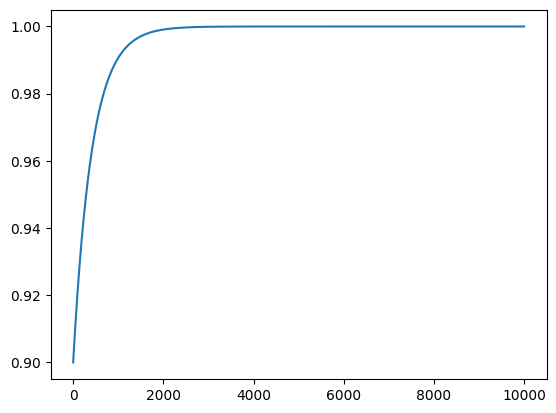

In [20]:
n = 10000
un = 0.9
dt = 0.001

un1_list = [un]
for i in range(n):
    un1 = ForwardEuler_FE(un, dudt_353, dt)
    un1_list.append(un1)
    un = un1

print(un1_list)
fig, ax = plt.subplots()
ax.plot(un1_list)

### **Newton's method for problems with systems of equations (i.e. $M$ > 1)**

$r_ i(x_0, \ldots , x_{M-1}) = 0, \qquad i = 0, \ldots , M-1.$

We use a multivariate **first order** Taylor series expansion:\
\
$\large\underline{r}(\underline{x}^ k + \Delta \underline{x}) \approx \underline{r}(\underline{x}^ k) + \nabla \underline{r}(\underline{x}^ k)\Delta \underline{x}$\
\
where the function of the tangent plane at $x^k$ to the function $\underline{r}(\underline{x})$ is:\
\
$\underline{r_{tan}}(x) = \underline{r}(x^k) + J_{\underline{x^k}} (x - x^k)$

And the gradient of $\underline{r}$ is equal to the Jacobian matrix $J$ evaluated at $\underline{x}^k$ where,\
\
$J_{i,j} = \frac{\partial r_ i}{\partial x_ j}$

Continuing with the derivation of Newton's method for a system, we set the Taylor series approximation to zero to find $\Delta \underline{x}$:\
\
$\underline{r}(\underline{x}^ k) + J(\underline{x}^ k)\Delta \underline{x}= 0 \Rightarrow J(\underline{x}^ k)\Delta \underline{x}= -\underline{r}(\underline{x}^ k)$\
\
which is a system of linear equations akin to $K \underline{x} = \underline{b}$ that must be solved for each iteration.

And finally, we update $\underline{x}^ k$ by $\Delta \underline{x}$:\
\
$\underline{x}^{k+1} = \underline{x}^ k + \Delta \underline{x}$

________________________________________________________________

**Backward Euler and Implicit Methods**

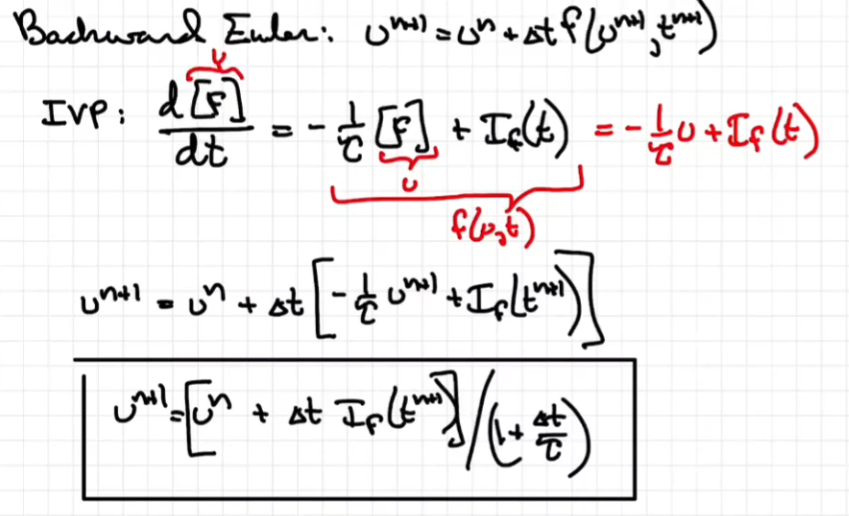

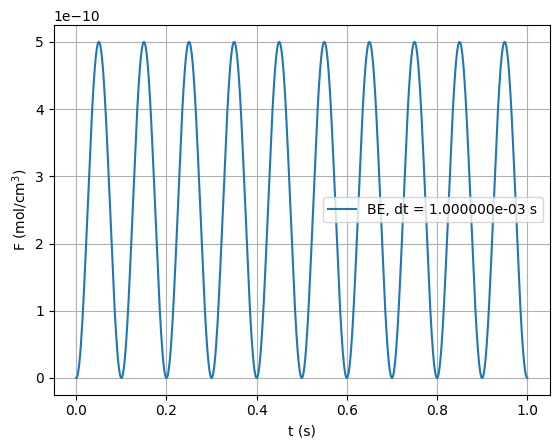

In [11]:
# code Backward Euler
import numpy as np
import matplotlib.pyplot as plt

tau = 5.0e-8 # s
T_F = 0.1 # s
A_F = 0.01 # mol/cm^3/s

pi = np.pi
FI = 0.0 # mol/cm^3
tF = 1 # final time to simulate to (s)
dt = 1e-3 # time increment to give solutions at (s)

# Sets initial condition
t = np.arange(0,tF+dt,dt)
N = len(t)
v = np.zeros(N)
v[0] = FI

# Loop from from t=0 to t>=tF
for n in range(N-1):
    tn1 = t[n+1]
    vn  = v[n]
    
    # Update solution using Backward Euler method
    I_F = 0.5*A_F*(1-np.cos(2*pi*tn1/T_F))
    
    v[n+1] = (vn + dt*I_F)/(1+dt/tau)

# Plot
plt.plot(t,v,label=f'BE, dt = {dt:.6e} s')
plt.xlabel('t (s)')
plt.ylabel('F (mol/cm$^3$)')
plt.grid(True)
plt.legend()

[1, -9.0, 81.0, -729.0, 6561.0, -59049.0, 531441.0, -4782969.0, 43046721.0, -387420489.0, 3486784401.0]


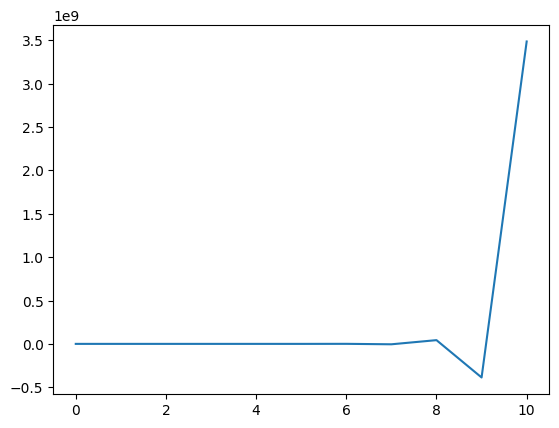

In [12]:
def dudt_354(u):
    return -1000 * u

n = 10
un = 1
dt = 0.01

un1_list = [un]
for i in range(n):
    un1 = ForwardEuler_FE(un, dudt_354, dt)
    un1_list.append(un1)
    un = un1
    
print(un1_list)
fig, ax = plt.subplots()
ax.plot(un1_list)

$\large\frac{du}{dt}$ $= -1000u$\
$u^0 = 1$
\
find $u_{FE}^1$ with Backward Euler, $\Delta t= 0.01$:\
\
$u_{FE}^1 = 1 + \Delta t$ $(-1000u_{FE}^1)$ \
$1001 u_{FE}^1$ = 1$\
$u_{FE}^1 = \frac{1}{1001}$

_______________________________________

## Implementation of Implicit Methods for **Linear** Systems

For Forward Euler method, the state $\underline{v}^n$ is updated to $\underline{v}^{n+1}$ with the following equation:\
\
$\underline{v}^{n+1} = \underline{v}^ n + \Delta t\left[ A\underline{v}^ n + \underline{b}(t^ n)\right]$\
\
where $[ A\underline{v}^ n + \underline{b}(t^ n)]$ is the forcing function and derivative, meaning:\
\
$\Large\frac{d\underline{v}^n}{dt} = \underline{f}(\underline{v}^n, t^n) = [ A\underline{v}^ n + \underline{b}(t^ n)]$\
\
The computational cost of a Forward Euler iteration will be dominated by the matrix-vector multiplication $A\underline{v}^n$ (unless $\underline{b}(t)$ is an extremely complex function to evaluate). The asymptotic computational complexity of a matrix-vector multiplication is $2 M^2$

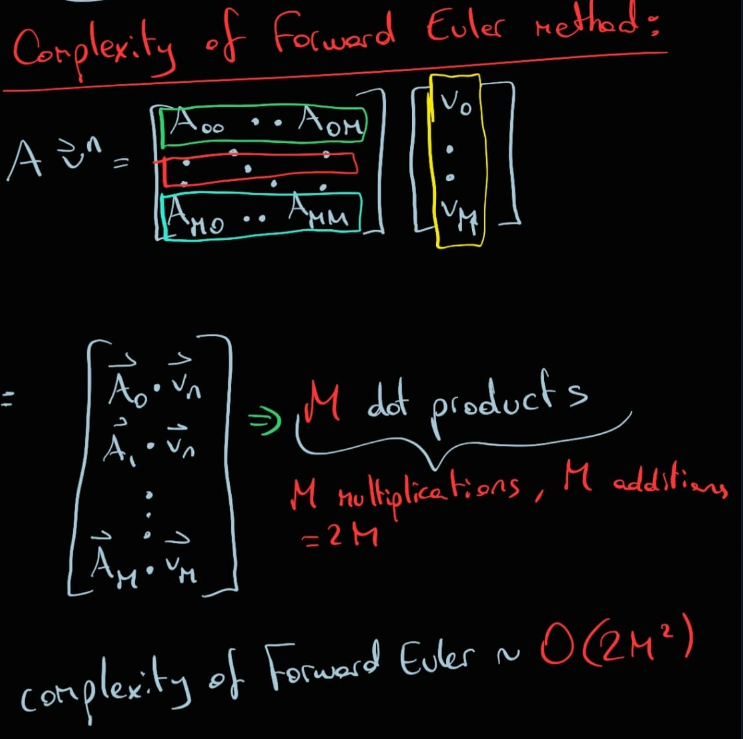

For **Backward Euler** method we have the following equation: $\underline{v}^{n+1} = \underline{v}^ n + \Delta t\left[ A\underline{v}^{n+1} + \underline{b}(t^{n+1})\right]$\
Re-arrange the equation:\
\
$(I - \Delta tA)\, \underline{v}^{n+1} = \underline{v}^ n + \Delta t\underline{b}(t^{n+1})$\
\
where $I$ is an $M$ x $M$ identity matrix
and $\underline{v}^{n+1}$ can be calculated easily. Notice that this equation is equivalent to:\
\
$K\underline{x} = \underline{b}(t)$\
\
So, we need to solve for $\underline{x}(t)$ an $M$ x $M$ system of linear equations if we decide to use **Backward Euler** method.

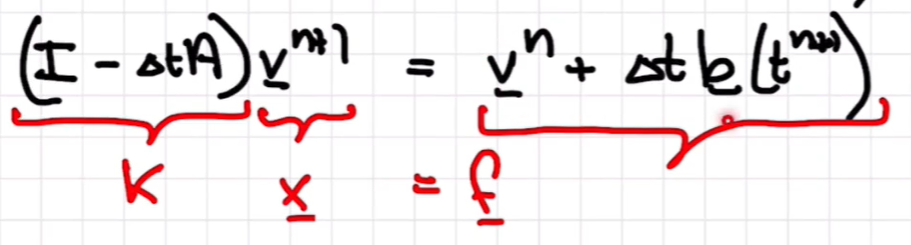

**Forward vs Backward Euler:**\
\
Forward Euler (explicit method) complexity ~ $O(M^2)$ ($M$ dot products with $2M$ operations each.)\
Backward Euler (implicit method) complexity ~ $O(M^3)$ (Because we need to solve an $M$ x $M$ system of linear equations)\
\
Remember, implicit methods are generally more costly to compute. But they don't have a stability upper bound on $\Delta t$ so, pick your poison :)

_____________________________

## Implementation of Implicit Methods for **Nonlinear** Systems

Suppose $\underline{f}$ is a non-linear function. By re-arranging the **Backward Euler** equation $\underline{v}^{n+1} = \underline{v}^n + \Delta t \underline{f}(\underline{v}^{n+1}, t^{n+1})$, we get:\
\
$\frac{1}{\Delta t}\left(\underline{v}^{n+1} -\underline{v}^ n\right) - \underline{f}(\underline{v}^{n+1}, t^{n+1}) = 0$\
\
where it can be thought as a classical root-finding problem where the root\
we want to find is $\underline{v}^{n+1}$ , substituted for $\underline{v}$ as input in the residual function $\underline{r}(\underline{v})$\
\
$\underline{r}(\underline{v}) \equiv \frac{1}{\Delta t}\left(\underline{v}- \underline{v}^ n\right) - \underline{f}(\underline{v}, t^{n+1})$\
\
$\underline{r}(\underline{v}^{n+1}) \equiv \frac{1}{\Delta t}\left(\underline{v}^{n+1}- \underline{v}^ n\right) - \underline{f}(\underline{v}^{n+1}, t^{n+1}) = 0$

If we apply the Newton-Raphson method to find the root, then the Jacobian matrix of $\underline{r}(\underline{v})$ is also needed.\
Recall, the Jacobian matrix is the derivatives of the residuals with respect to the **states** $v_0, v_1, ...$ :*\
\
$\newcommand\arraystretch {1.5} J = \nabla \underline{r}(\underline{v}) = \left( \begin{array}{cccc} \frac{\partial r_0}{\partial v_0} &  \frac{\partial r_0}{\partial v_1} &  \ldots &  \frac{\partial r_0}{\partial v_{M-1}} \\ \frac{\partial r_1}{\partial v_0} &  \frac{\partial r_1}{\partial v_1} &  \ldots &  \frac{\partial r_1}{\partial v_{M-1}} \\ \vdots &  \vdots &  \vdots &  \vdots \\ \frac{\partial r_{M-1}}{\partial v_0} &  \frac{\partial r_{M-1}}{\partial v_1} &  \ldots &  \frac{\partial r_{M-1}}{\partial v_{M-1}} \end{array} \right)$

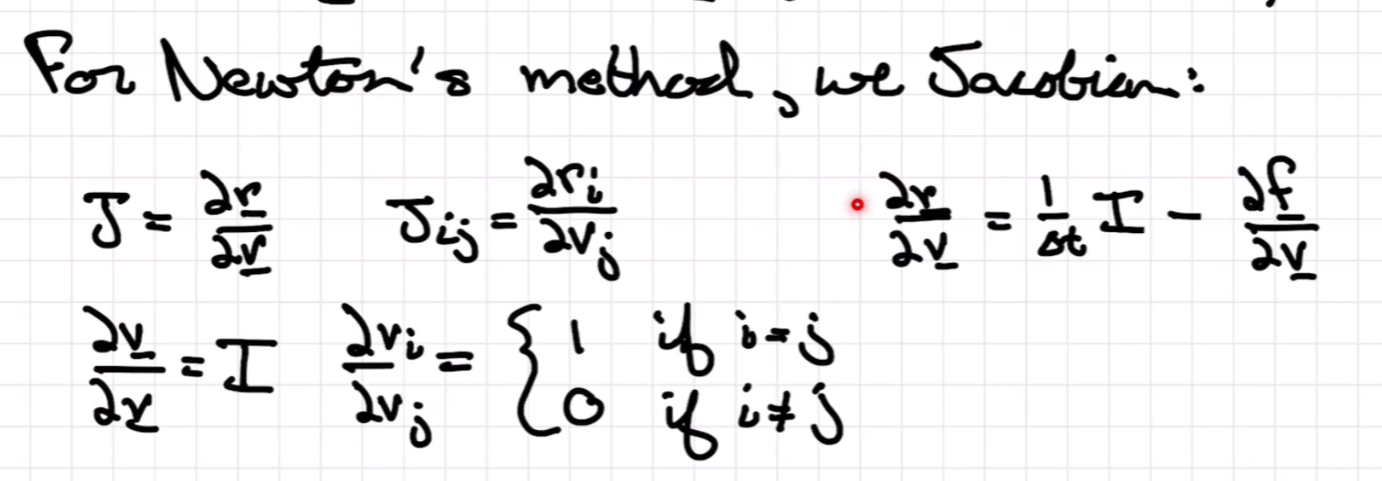

Specifically, for the Backward Euler residual defined as in above, the **Jacobian** is:\
\
$J = \frac{1}{\Delta t} I - \nabla \underline{f}(\underline{v},t^{n+1})$